In [7]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(931)

'''
[1] FINITE SIZE SCALING ANALYSIS

study behaviour of critical temperature and critical exponents 
depend on the system size and interaction strength disorder between the 
spins
'''

'''
[2]

Entanglement spectra 
Output distributions

Support Vector Machines 
Neural Networks
'''

class Ising_Chain():
    ''' Simulating Ising model '''

    # List of measurement points
    m_x = [2, 4, 8, 16, 24, 32, 48, 64, 120, 240, 480]
    temp_val = [0.1, 0.2, 0.3, 0.4]
    
    def __init__(self,N=480,temp=0.4, J=1.0, d_J=.3,measure = 1000,J_ij=None, config=None):
        self.N = N
        self.temp = temp
        self.J = J
        self.d_J = d_J
        self.measure = measure
        
        if J_ij is None:
            J_ij = self.J + (2 * self.d_J * np.random.rand(N, N) - self.d_J)
        if config is None:
            config = 2 * np.random.randint(2, size=(N, N)) - 1
            
        self.config = config
        self.J_ij = J_ij

    def mcmc(self,beta,config=None,J_ij=None):
        N = self.N
        config = self.config
        J_ij = self.J_ij
        # Randomly generated indices
        a = np.random.randint(0, N, size=(N, N))
        b = np.random.randint(0, N, size=(N, N))
        # Select elements from the config array based on indices
        z = self.config[a, b]
        # Compute the neighboring sum array
        self.n_x = config[(a+1)%N,b] + config[a,(b+1)%N] + config[(a-1)%N,b] + config[a,(b-1)%N]
        # Compute the energy change array
        x = 2 * z * self.n_x * self.J_ij   
        
        # Generate a boolean array indicating which elements of 'config' should be flipped
        flip_indices = np.logical_or(x < 0, np.random.rand(N, N) < np.exp(-x * beta))
        # Flip the selected elements in 'config'
        z[flip_indices] *= -1
        self.config[a, b] = z.reshape((N, N))

        return config

    def simulation(self):
        # Initialize the configuration random
        # Create the figure for plotting
        f = plt.figure(figsize=(15, 15), dpi=80)
        # Plot the initial configuration
        self.QPlot(f, self.config, 0, self.N, 1)
            # Iterate over the desired number of measurements
        for i in range(1, self.measure+1):
                # Perform a Monte Carlo move to update the configuration
            self.config = self.mcmc(1.0/self.temp, config = self.config)
            if i in self.m_x:
                # Plot the configuration at the specified measurement points
                self.QPlot(f, self.config, i, self.N, self.m_x.index(i) + 2)  
                
    def QPlot(self, f, config, i, N, n_):
        # Create the meshgrid for plotting
        X, Y = np.meshgrid(range(N), range(N))
        sp_x = f.add_subplot(4, 4, n_)
        plt.setp(sp_x.get_yticklabels(), visible=False)  # Hide y-axis tick labels
        plt.setp(sp_x.get_xticklabels(), visible=False)  # Hide x-axis tick labels
        
        print("Shape of config: ", config.shape)  # Debug line
        print("Content of config: ", config)  # Debug line
        
        plt.pcolormesh(X, Y, config, cmap=plt.cm.RdBu)  # Plot the colored mesh
        plt.title('Measure=%d' % i)  # Set the plot title
        plt.axis('tight')  # Set the axis limits to fit the plot
                
    '''[1]'''
    
    def magnetise(self):
        return (np.sum(self.config) / self.N**2)
    
    def energise(self):
        return 0.5 *np.sum(self.J_ij * self.config * self.n_x)
    
    def critical_temp(self, n_=100):
        f1, ax1 = plt.subplots()
        f2, ax2 = plt.subplots()
        f3, ax3 = plt.subplots()

        for N in self.m_x:
            self.N = N
            self.config = 2 * np.random.randint(2, size=(N, N)) - 1
            self.J_ij = self.J + (2 * self.d_J * np.random.rand(N, N) - self.d_J)
            binder = np.zeros(len(self.temp_val))
            avgmag = np.zeros(len(self.temp_val))
            avgene = np.zeros(len(self.temp_val))
            for i, temp in enumerate(self.temp_val):
                self.temp = temp
                mag_val = np.zeros(n_)
                eng_val = np.zeros(n_)

                for j in range(1, self.measure):
                    self.config = self.mcmc(1.0/self.temp, config = self.config)
                    if j >= self.measure - n_:
                        mag_val[j - (self.measure - n_)] = self.magnetise()
                        eng_val[j - (self.measure - n_)] = self.energise()

                denom = (3*np.mean(mag_val**2)**2)
                binder[i] = 1 - np.mean(mag_val**4)/denom if denom != 0 else 0  
                avgmag[i] = np.mean(mag_val)
                avgene[i] = np.mean(eng_val)

            ax1.plot(self.temp_val, binder,label=f'N={N}')
            ax1.axis([0.1,0.25,0.64,0.67])
            ax1.axvline(x=0.2,color = 'r', linestyle = '--')
            ax1.legend()
            ax1.set_xlabel('Temperature')
            ax1.set_ylabel('BC')

            ax2.plot(self.temp_val,avgmag,label=f'N={N}')
            ax2.legend()
            ax2.set_xlabel('Temperature')
            ax2.set_ylabel('Magnetisation')

            ax3.plot(self.temp_val,avgene,label=f'N={N}')
            ax3.legend()
            ax3.set_xlabel('Temperature')
            ax3.set_ylabel('Energy')
            
        return binder
        
               # if np.sum(binder) != 0:    
               #     print(f"Binder cumulant at temp={temp}: {binder}")
               # else:
               #     pass
    
'''
[2]

MACHINE LEARNING ARCHITECTURE'''




'\n[2]\n\nMACHINE LEARNING ARCHITECTURE'

array([0.66604743, 0.66655329, 0.66656336, 0.66652617])

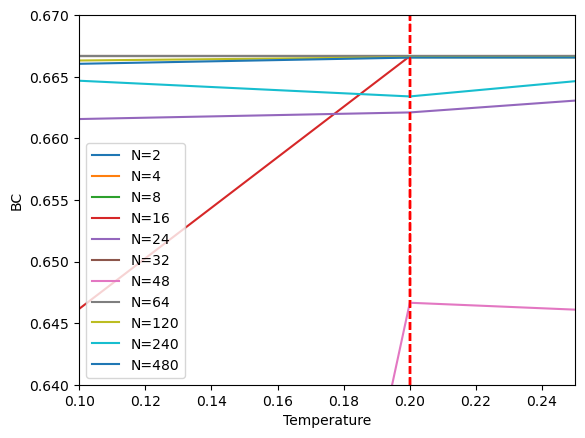

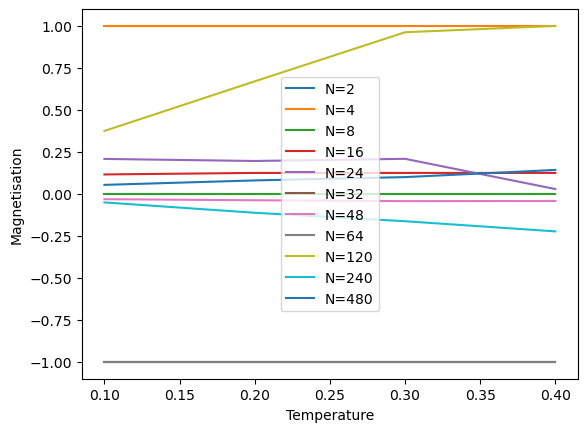

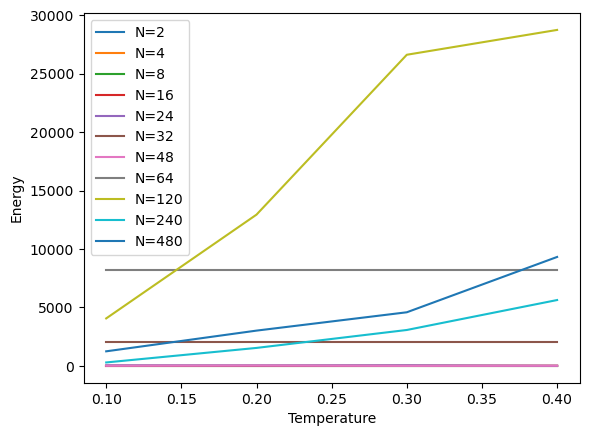

In [8]:
xp = Ising_Chain()
xp.critical_temp()